# Notebook for compiling inclination shallowing data

In [1]:
import numpy as np
from scipy.stats import norm
import scipy.stats as st

import pandas as pd
pd.set_option('display.max_rows', 500)
import pmagpy.pmag as pmag

import matplotlib.pyplot as plt

Let's create an empty dataframe that will be populated with pole means called 'pole_means'.

<b>locality | lithology | f | f_min | f_max | ref | mineralogy | method | n | N |</b>

<b>locality</b> = Name of loaclity of the study. this could be formation name of region name or locality of the <br>
<b>lithology</b> = lithology type with categories of 'siliciclastic', 'carbonate', and 'mixed'<br>
<b>f</b> = estimated f factor<br>
<b>f_min</b> = lower bound on 95% confidence of f<br>
<b>f_max</b> = upper bound on 95% confidence of f<br>
<b>ref</b> = reference<br>
<b>mineralogy</b> = magnetic mineralogy with categories of 'magnetite', 'hematite', and 'greigite'<br>
<b>method</b> = method used to estimate f<br>
<b>n</b> = number of samples used (for E/I method)<br>

In [2]:
f_compilation = pd.DataFrame(columns=['locality','lithology','f','f_min','f_max','ref',
                                   'mineralogy','method','n'])

In [3]:
def f_calc(Io,Ilow,IEI,Ihigh):
    f_EI = [np.round(np.tan(np.radians(Io[i]))/np.tan(np.radians(IEI[i])),2) for i in range(len(Io))]
    f_max = [np.round(np.tan(np.radians(Io[i]))/np.tan(np.radians(Ilow[i])),2) for i in range(len(Io))]
    f_min = [np.round(np.tan(np.radians(Io[i]))/np.tan(np.radians(Ihigh[i])),2) for i in range(len(Io))]
    print(f_EI,f_min,f_max)
    return f_EI,f_min,f_max

## Tauxe and Kent, 2004

*A Simplified Statistical Model for the Geomagnetic Field and the Detection of Shallow Bias in Paleomagnetic Inclinations: Was the Ancient Magnetic Field Dipolar?*

>using Central Asian red beds of the Subei Fm, data from Gilder et al., 2001

In [4]:
Io = [43.7]
Ilow = [56]
IEI = [63]
Ihigh = [69]

Tauxe2004_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.49] [0.37] [0.64]


In [5]:
f_compilation.loc['Tauxe2004'] = pd.Series({'locality' : 'Subei',
                                          'lithology' : 'red beds',
                                           'f' : Tauxe2004_f[0][0],
                                           'f_min' : Tauxe2004_f[1][0],
                                           'f_max' : Tauxe2004_f[2][0],
                                           'ref' : 'Tauxe and Kent, 2004',
                                           'mineralogy' : 'hematite',
                                           'method' : 'EI',
                                           'n' : 222})

## Tauxe 2005

*Inclination flattening and the geocentric axial dipole hypothesis*

>middle Miocene data from the Potwar Plateau of Tauxe and Opdyke

In [6]:
Io = [33.7]
Ilow = [31]
IEI = [41]
Ihigh = [49]

Tauxe2005_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.77] [0.58] [1.11]


In [7]:
f_compilation.loc['Tauxe2005'] = pd.Series({'locality' : 'Potwar',
                                          'lithology' : 'red beds',
                                           'f' : Tauxe2005_f[0][0],
                                           'f_min' : Tauxe2005_f[1][0],
                                           'f_max' : Tauxe2005_f[2][0],
                                           'ref' : 'Tauxe, 2005',
                                           'mineralogy' : 'hematite',
                                           'method' : 'EI',
                                           'n' : 105})

## Yan et al., 2005

*Shallow bias in Neogene palaeomagnetic directions from the Guide Basin, NE Tibet, caused by inclination error*

>The data was compiled and re-run by Dupont 2010, but we compile it here honoring the original publication

In [8]:
Io = [44]
Ilow = [53]
IEI = [57]
Ihigh = [64]

Yan2005_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.63] [0.47] [0.73]


In [9]:
f_compilation.loc['Yan2005'] = pd.Series({'locality' : 'Gudie',
                                          'lithology' : 'fluvial sediments',
                                           'f' : Yan2005_f[0][0],
                                           'f_min' : Yan2005_f[1][0],
                                           'f_max' : Yan2005_f[2][0],
                                           'ref' : 'Yan et al., 2005',
                                           'mineralogy' : 'mixed',
                                           'method' : 'EI',
                                           'n' : 627})

## Kent and Tauxe 2005 

*Corrected Late Triassic Latitudes for Continents Adjacent to the North Atlantic*

>Note St. Audrie's Bay has only 27 directions and this was excluded by Vaes 2021

In [10]:
Io = [5.9,5.2,8.8,13,14.2,15.7,17.5,18.2,33.4,45.1]
Ilow = [8,5,16,17,19,21,28,29,33,51]
IEI = [10,9,21,20,21,24,33,34,44,60]
Ihigh = [12,13,25,23,24,28,37,38,48,65]
n=[333,148,194,308,336,309,246,302,27,222]
locality=['Dan River','Princeton','Nursery','Titusville','Rutgers','Somerset','Weston','Martinsville',"St. Audrie's Bay",'Jameson Land']
mineralogy = ['mixed','hematite','hematite','hematite','hematite','hematite','hematite','hematite','hematite','hematite']
lithology = ['red siltstone and gray/black mud', 'red beds', 'red beds', 'red beds','red beds','red beds','red beds','red beds','red beds','red beds']

Kent2005_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.59, 0.57, 0.4, 0.63, 0.66, 0.63, 0.49, 0.49, 0.68, 0.58] [0.49, 0.39, 0.33, 0.54, 0.57, 0.53, 0.42, 0.42, 0.59, 0.47] [0.74, 1.04, 0.54, 0.76, 0.73, 0.73, 0.59, 0.59, 1.02, 0.81]


In [11]:
for i in range(len(Io)):
    f_compilation.loc['Kent2005_'+str(i+1)] = pd.Series({'locality' : locality[i],
                                          'lithology' : lithology[i],
                                           'f' : Kent2005_f[0][i],
                                           'f_min' : Kent2005_f[1][i],
                                           'f_max' : Kent2005_f[2][i],
                                           'ref' : 'Kent and Tauxe, 2005',
                                           'mineralogy' : mineralogy[i],
                                           'method' : 'EI',
                                           'n' : n[i]})

## Kent and Olson 2008

*Early Jurassic magnetostratigraphy and paleolatitudes from the Hartford continental rift basin (eastern North America): Testing for polarity bias and abrupt polar wander in association with the central Atlantic magmatic province*


In [12]:
Io = [21.1]
Ilow = [32]
IEI = [35.5]
Ihigh = [39]
n=[315]

KentTauxe2008_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.54] [0.48] [0.62]


In [13]:
f_compilation.loc['KentTauxe2008'] = pd.Series({'locality' : 'Hartford',
                                          'lithology' : 'red beds',
                                           'f' : KentTauxe2008_f[0][0],
                                           'f_min' : KentTauxe2008_f[1][0],
                                           'f_max' : KentTauxe2008_f[2][0],
                                           'ref' : 'Kent and Olson, 2008',
                                           'mineralogy' : 'hematite',
                                           'method' : 'EI',
                                           'n' : n[0]})

## Krijgsman and Tauxe 2004 

*Shallow bias in Mediterranean paleomagnetic directions caused by inclination error*

>This study was not included in Vaes et al., 2021. We add it here

>The lithology and mineralogy of the rocks are tricky! Original magnetostrat paper describes both clastic and carbonate rocks in the succession and both magnetite and hematite carry remanence. 

>The Crete rocks are dominantly marine carbonates and sandstones we do not include them here

In [14]:
Io = [44]
Ilow = [49]
IEI = [53]
Ihigh = [57]

KrijgsmanTauxe2004_f_1 = f_calc(Io,Ilow,IEI,Ihigh)

[0.73] [0.63] [0.84]


In [15]:
f_compilation.loc['Krijgsman2004'] = pd.Series({'locality' : 'Calatayud basin',
                                          'lithology' : 'fluvial and lacustrine sediments',
                                           'f' : KrijgsmanTauxe2004_f_1[0][0],
                                           'f_min' : KrijgsmanTauxe2004_f_1[1][0],
                                           'f_max' : KrijgsmanTauxe2004_f_1[2][0],
                                           'ref' : 'Krijgsman and Tauxe, 2004',
                                           'mineralogy' : 'mixed',
                                           'method' : 'EI',
                                           'n': 648})

## Krijgsman and Tauxe 2006

*E/I corrected paleolatitudes for the sedimentary rocks of the Baja British Columbia hypothesis*

>Note in their table 1, data from two sedimentary formations are studied with E/I--- the Silverquick formation and the Nanaimo formation

>Silverquick formation contains groups Mount Tatlow and Group Churn Creek

>Nanaimo formation contains group Pender/Spray and Northumberland

>both groups of Silverquick have N>100

>the combined dataset for Nanaimo has N>100 

>Following the approach of Vaes et al., 2021, we include data for the individual formations of Silverquick and include data of combined Nanaimo


In [16]:
Io = [57.2, 55.7, 47.1]
Ilow = [56,56,48]
IEI = [58,60,555]
Ihigh = [63,70,63]
n=[176,129,143]

locality=['Mount Tatlow', 'Churn Creek', 'Nanaimo']
lithology=['fluvial sediments', 'fluvial sediments','marine mud- and siltstones']

Krijgsman2006_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.97, 0.85, 4.02] [0.79, 0.53, 0.55] [1.05, 0.99, 0.97]


In [17]:
for i in range(len(Io)):
    f_compilation.loc['Krijgsman2006'] = pd.Series({'locality' : locality[i],
                                              'lithology' : lithology[i],
                                               'f' : Krijgsman2006_f[0][0],
                                               'f_min' : Krijgsman2006_f[1][0],
                                               'f_max' : Krijgsman2006_f[2][0],
                                               'ref' : 'Krijgsman and Tauxe, 2006',
                                               'mineralogy' : 'magnetite',
                                               'method' : 'EI',
                                               'n' : n[i]})

## Van Hinsbergen et al., 2007



In [18]:
Io = [48.4,-42.1]
Ilow = [47.6,-45.5]
IEI = [53.4,-56.9]
Ihigh = [67.9,-67.5]

Hinsbergen2007_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.84, 0.59] [0.46, 0.37] [1.03, 0.89]


In [19]:
f_compilation.loc['Van-Hinsbergen2007_1'] = pd.Series({'locality' : 'Ag. Giorgios & Monolithos',
                                          'lithology' : 'palustrine and lacustrine sediments',
                                           'f' : Hinsbergen2007_f[0][0],
                                           'f_min' : Hinsbergen2007_f[1][0],
                                           'f_max' : Hinsbergen2007_f[2][0],
                                           'ref' : 'Van Hinsbergen et al., 2007',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'EI',
                                           'n':42})

In [20]:
f_compilation.loc['Van-Hinsbergen2007_2'] = pd.Series({'locality' : 'Kefala & Aspropetres',
                                          'lithology' : 'palustrine and lacustrine sediments',
                                           'f' : Hinsbergen2007_f[0][1],
                                           'f_min' : Hinsbergen2007_f[1][1],
                                           'f_max' : Hinsbergen2007_f[2][1],
                                           'ref' : 'Van Hinsbergen et al., 2007',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'EI',
                                           'n':75})

## Tauxe et al., 2008

*Testing corrections for paleomagnetic inclination error in sedimentary rocks: A comparative approach*

>Using data from titanohematite-bearing Paleocene sedimentary rocks from the Nacimiento Formation of New Mexico (Butler and Taylor, 1978; Kodama, 1997).

In [21]:
Io = [51.2]
Ilow = [50.8]
IEI = [56.1]
Ihigh = [68.2]

Tauxe2008_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.84] [0.5] [1.01]


In [22]:
f_compilation.loc['Tauxe2008'] = pd.Series({'locality' : 'Nacimiento',
                                          'lithology' : 'claystones and siltstones',
                                           'f' : Tauxe2008_f[0][0],
                                           'f_min' : Tauxe2008_f[1][0],
                                           'f_max' : Tauxe2008_f[2][0],
                                           'ref' : 'Tauxe et al., 2008',
                                           'mineralogy' : 'hematite',
                                           'method' : 'EI',
                                           'n':102})

## Haldan et al., 2009

*A comparison of detailed equatorial red bed records of secular variation during the Permo-Carboniferous Reversed Superchron*

>from the hysteresis loops Dome de Barrot is domnantly hematite and Lodeve is dominated by a mix of magnetite and hematite

>we use different dataset than selected by Vaes et al., 2021. the authors prefered to use the full dataset to show E/I results in the paper for Dome and use individual dataset for Lodeve

>it is tricky to make use the lower inc bounds for Lodeve Kungurian - Wardian as it results in some possible negtive inclinations while the observed is positive inclinations. For our purposes we will consider the upper f bound set to 1

In [23]:
Io = [-15.9,2.1,-7.4]
Ilow = [-15.4,2.1,-6.4]
IEI = [-17.5,2.7,-8.9]
Ihigh = [-19.8,5.7,-11.7]

Haldan2009_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.9, 0.78, 0.83] [0.79, 0.37, 0.63] [1.03, 1.0, 1.16]


In [24]:
f_compilation.loc['Haldan2009_1'] = pd.Series({'locality' : 'Dome de Barrot',
                                          'lithology' : 'red mudstone and purple siltstone',
                                           'f' : Haldan2009_f[0][0],
                                           'f_min' : Haldan2009_f[1][0],
                                           'f_max' : Haldan2009_f[2][0],
                                           'ref' : 'Haldan et al., 2009',
                                           'mineralogy' : 'hematite',
                                           'method' : 'EI',
                                           'n':411})

In [25]:
f_compilation.loc['Haldan2009_2'] = pd.Series({'locality' : 'Lodeve (Kungurian – Wordian)',
                                          'lithology' : 'red siltstones and calcareous siltstone',
                                           'f' : Haldan2009_f[0][1],
                                           'f_min' : Haldan2009_f[1][1],
                                           'f_max' : Haldan2009_f[2][1],
                                           'ref' : 'Haldan et al., 2009',
                                           'mineralogy' : 'mixed',
                                           'method' : 'EI',
                                           'n':146})

In [26]:
f_compilation.loc['Haldan2009_3'] = pd.Series({'locality' : 'Lodeve (Sakmarian-Artinskian)',
                                          'lithology' : 'red siltstones and calcareous siltstone',
                                           'f' : Haldan2009_f[0][2],
                                           'f_min' : Haldan2009_f[1][2],
                                           'f_max' : Haldan2009_f[2][2],
                                           'ref' : 'Haldan et al., 2009',
                                           'mineralogy' : 'mixed',
                                           'method' : 'EI',
                                           'n':143})

## Costa et al., 2009

*Closing and continentalization of the South Pyrenean foreland basin (NE Spain): magnetochronological constraints*

In [27]:
Io = [41]
Ilow = [48.4]
IEI = [56.2]
Ihigh = [64.2]

Costa2009_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.58] [0.42] [0.77]


In [28]:
f_compilation.loc['Costa2009'] = pd.Series({'locality' : 'Artes',
                                          'lithology' : 'red beds',
                                           'f' : Costa2009_f[0][0],
                                           'f_min' : Costa2009_f[1][0],
                                           'f_max' : Costa2009_f[2][0],
                                           'ref' : 'Costa et al., 2009',
                                           'mineralogy' : 'mixed',
                                           'method' : 'EI',
                                           'n':221})

## Meijers et al., 2010

*Late Cretaceous to Paleocene oroclinal bending in the central Pontides (Turkey)*

>only inclding site TA5 here because TA2 is red pelagic limestone

In [29]:
f_compilation.loc['Meijers2010'] = pd.Series({'locality' : 'TA5',
                                          'lithology' : 'turbiditic volcanoclastics',
                                           'f' : 0.94,
                                           'f_min' : 0.68,
                                           'f_max' : 1,
                                           'ref' : 'Meijers et al., 2010',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'EI',
                                           'n':115})

## Dupont-Nivet et al., 2010

*Persistently low Asian paleolatitudes: Implications for the India‐Asia collision history*

>The Subei data was already corrected in the original E/I study of Tauxe 2004. We do not include it ehre. 

>The Guide data was not included by Vaes et al., 2021 but we include it here. 

>The Zongshan and Zongpu formations included in this paper are spelled wrong in the paper and are carbonates, so we do not include them here

In [30]:
Io = [45,50,43]
Ilow = [45,49,50]
IEI = [52,53,54]
Ihigh = [63,59,60]
n = [95,185,228]
locality=['Ctg‐Xsh', 'Xiejia', 'Mahalagou']
lithology=['red beds','red beds','red beds']

Dupont2010_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.78, 0.9, 0.68] [0.51, 0.72, 0.54] [1.0, 1.04, 0.78]


In [31]:
for i in range(len(Io)):
    f_compilation.loc['Dupont2010_'+str(i+1)] = pd.Series({'locality' : locality[i],
                                              'lithology' : lithology[i],
                                               'f' : Dupont2010_f[0][i],
                                               'f_min' : Dupont2010_f[1][i],
                                               'f_max' : Dupont2010_f[2][i],
                                               'ref' : 'Dupont-Nivet et al., 2010',
                                               'mineralogy' : 'mixed',
                                               'method' : 'EI',
                                               'n' : n[i]})

## Tan et al., 2010

*New paleomagnetic results from the Lhasa block: Revised estimation of latitudinal shortening across Tibet and implications for dating the India–Asia collision*

>This is the Shexing Fm in the Lhasa block

>Vaes used section A results but looks like we can use the combined A and B section E/I results which are very similar to that of A

In [32]:
Io = [23.5]
Ilow = [39.9]
IEI = [42]
Ihigh = [44.5]

Tan2010_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.48] [0.44] [0.52]


In [33]:
f_compilation.loc['Tan2010'] = pd.Series({'locality' : 'Shexing',
                                          'lithology' : 'red beds',
                                           'f' : Tan2010_f[0][0],
                                           'f_min' : Tan2010_f[1][0],
                                           'f_max' : Tan2010_f[2][0],
                                           'ref' : 'Tan et al., 2010',
                                           'mineralogy' : 'hematite',
                                           'method' : 'EI',
                                           'n':377})

## Van Hinsbergen et al., 2010

*Testing Miocene Remagnetization of Bey Dağları: Timing and Amount of Neogene Rotations in SW Turkey*



In [34]:
f_compilation.loc['Van-Hinsbergen2010'] = pd.Series({'locality' : 'Korkuteli',
                                          'lithology' : 'blue clays and turbiditic sandstone',
                                           'f' : 0.67,
                                           'f_min' : 0.53,
                                           'f_max' : 0.83,
                                           'ref' : 'Van Hinsbergen et al., 2010',
                                           'mineralogy' : 'mixed',
                                           'method' : 'EI',
                                           'n':192})

## Van Hinsbergen et al., 2012

*Greater India Basin hypothesis and a two-stage Cenozoic collision between India and Asia*

>This is interesting to look at in comparison with Tan et al., 2010 paper as both studies worked on the Shexing Fm but get quite different estimates of f

In [35]:
f_compilation.loc['Van-Hinsbergen2012'] = pd.Series({'locality' : 'Shexing',
                                          'lithology' : 'red beds',
                                           'f' : 0.66,
                                           'f_min' : 0.53,
                                           'f_max' : 0.91,
                                           'ref' : 'Van Hinsbergen et al., 2012',
                                           'mineralogy' : 'hematite',
                                           'method' : 'EI',
                                           'n':100})

## Lanci et al., 2013

*Upper Permian magnetic stratigraphy of the lower Beaufort Group, Karoo Basin*



In [36]:
Io = [53]
Ilow = [56]
IEI = [62.2]
Ihigh = [73]

Lanci2013_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.7] [0.41] [0.9]


In [37]:
f_compilation.loc['Lanci2013'] = pd.Series({'locality' : 'Karoo basin',
                                          'lithology' : 'fluvial sand-, silt- and mudstone',
                                           'f' : Lanci2013_f[0][0],
                                           'f_min' : Lanci2013_f[1][0],
                                           'f_max' : Lanci2013_f[2][0],
                                           'ref' : 'Lanci et al., 2013',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'EI',
                                           'n':136})

## Hunag et al., 2013 

*Inclination shallowing in Eocene Linzizong sedimentary rocks from Southern Tibet: correction, possible causes and implications for reconstructing the India–Asia collision*

In [38]:
Io = [20.5]
Ilow = [33.1]
IEI = [41.1]
Ihigh = [49.5]

Huang2013_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.43] [0.32] [0.57]


In [39]:
f_compilation.loc['Huang2013'] = pd.Series({'locality' : 'Linzizong',
                                          'lithology' : 'volcaniclastics and mudstones',
                                           'f' : Huang2013_f[0][0],
                                           'f_min' : Huang2013_f[1][0],
                                           'f_max' : Huang2013_f[2][0],
                                           'ref' : 'Hunag et al., 2013 ',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'EI',
                                           'n':119})

## Tong et al., 2013

*Internal crustal deformation in the northern part of Shan-Thai Block: New evidence from paleomagnetic results of Cretaceous and Paleogene redbeds*

In [40]:
Io = [23.6]
Ilow = [38.3]
IEI = [44.1]
Ihigh = [49.3]

Tong2013_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.45] [0.38] [0.55]


In [41]:
f_compilation.loc['Tong2013'] = pd.Series({'locality' : 'Mengla',
                                          'lithology' : 'red beds',
                                           'f' : Tong2013_f[0][0],
                                           'f_min' : Tong2013_f[1][0],
                                           'f_max' : Tong2013_f[2][0],
                                           'ref' : 'Tong et al., 2013',
                                           'mineralogy' : 'mixed',
                                           'method' : 'EI',
                                           'n':85})

## Kirscher et al., 2014 

*Correcting for inclination shallowing of early Carboniferous sedimentary rocks from Kyrgyzstan—indication of stable subtropical position of the North Tianshan Zone in the mid-late Palaeozoic*

>samples have a hematite component and a magnetite component.

>hematite component is flattened whereas magnetite component is not much

>we record them separately here

In [42]:
Io = [-35.1,-50.3]
Ilow = [-41.4,-49.8]
IEI = [-50.3,-54.5]
Ihigh = [-57.9,-62.3]

Kirsheretal2014_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.58, 0.86] [0.44, 0.63] [0.8, 1.02]


In [43]:
f_compilation.loc['Kirsher2014_1'] = pd.Series({'locality' : 'Sonkul Basin (DUN)',
                                          'lithology' : 'red beds',
                                           'f' : Kirsheretal2014_f[0][0],
                                           'f_min' : Kirsheretal2014_f[1][0],
                                           'f_max' : Kirsheretal2014_f[2][0],
                                           'ref' : 'Kirsher et al, 2014',
                                           'mineralogy' : 'hematite',
                                           'method' : 'EI',
                                           'n' : 115})

In [44]:
f_compilation.loc['Kirsher2014_2'] = pd.Series({'locality' : 'Sonkul Basin (DUN)',
                                          'lithology' : 'red beds',
                                           'f' : Kirsheretal2014_f[0][0],
                                           'f_min' : Kirsheretal2014_f[1][0],
                                           'f_max' : Kirsheretal2014_f[2][0],
                                           'ref' : 'Kirsher et al, 2014',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'EI',
                                           'n' : 115})

## Ding et al., 2015

*Paleomagnetism of the Oligocene Kangtuo Formation red beds (Central Tibet): Inclination shallowing and tectonic implications*

>great work showing the grain size dependence of the inclination shallowing effect

>we will compile the separate E/I application on data from the upper and lower section

In [45]:
Io = [28.9,21.1]
Ilow = [42.5,34.7]
IEI = [46.2,42.6]
Ihigh = [50,49.8]

Ding2015_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.53, 0.42] [0.46, 0.33] [0.6, 0.56]


In [46]:
f_compilation.loc['Ding2015_1'] = pd.Series({'locality' : 'Kangtuo lower section',
                                          'lithology' : 'red beds',
                                           'f' : Ding2015_f[0][0],
                                           'f_min' : Ding2015_f[1][0],
                                           'f_max' : Ding2015_f[2][0],
                                           'ref' : 'Ding et al., 2015',
                                           'mineralogy' : 'hematite',
                                           'method' : 'EI',
                                           'n':414})

In [47]:
f_compilation.loc['Ding2015_2'] = pd.Series({'locality' : 'Kangtuo upper section',
                                          'lithology' : 'red beds',
                                           'f' : Ding2015_f[0][1],
                                           'f_min' : Ding2015_f[1][1],
                                           'f_max' : Ding2015_f[2][1],
                                           'ref' : 'Ding et al., 2015',
                                           'mineralogy' : 'hematite',
                                           'method' : 'EI',
                                           'n':137})

## Huang et al., 2015

*Lower Cretaceous Xigaze ophiolites formed in the Gangdese forearc: Evidence from paleomagnetism, sediment provenance,
and stratigraphy*



In [48]:
Io = [16.9]
Ilow = [24.8]
IEI = [30.6]
Ihigh = [37.3]

Huang2015_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.51] [0.4] [0.66]


In [49]:
f_compilation.loc['Huang2015'] = pd.Series({'locality' : 'Sangsang',
                                          'lithology' : 'turbiditic sandstones',
                                           'f' : Huang2015_f[0][0],
                                           'f_min' : Huang2015_f[1][0],
                                           'f_max' : Huang2015_f[2][0],
                                           'ref' : 'Hunag et al., 2015',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'EI',
                                           'n':117})

## Chen et al., 2017

*Combined paleomagnetic and geochronological study on Cretaceous strata of the Qiangtang terrane, central Tibet*

In [50]:
Io = [34.2]
Ilow = [41.9]
IEI = [47.9]
Ihigh = [54.3]

Chenetal2017_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.61] [0.49] [0.76]


In [51]:
f_compilation.loc['Chen2017'] = pd.Series({'locality' : 'Qushenla',
                                          'lithology' : 'red beds',
                                           'f' : Chenetal2017_f[0][0],
                                           'f_min' : Chenetal2017_f[1][0],
                                           'f_max' : Chenetal2017_f[2][0],
                                           'ref' : 'Chen et al, 2017',
                                           'mineralogy' : 'mixed',
                                           'method' : 'EI',
                                           'n':174})

## Meng et al., 2017

*Reduced convergence within the Tibetan Plateau by 26 Ma?*


In [52]:
f_compilation.loc['Meng2017'] = pd.Series({'locality' : 'Sangsang',
                                          'lithology' : 'red beds',
                                           'f' : 0.52,
                                           'f_min' : 0.42,
                                           'f_max' : 0.72,
                                           'ref' : 'Meng et al., 2017',
                                           'mineralogy' : 'mixed',
                                           'method' : 'EI',
                                           'n':223})

## Tong et al., 2017

*Paleomagnetism of Eocene red-beds in the eastern part of the Qiangtang Terrane and its implications for uplift and southward crustal extrusion in the southeastern edge of the Tibetan Plateau*

In [53]:
Io = [27.8, 31.8]
Ilow = [34,33.5]
IEI = [40.3,40.4]
Ihigh = [45.3,46.7]

Tong2017_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.62, 0.73] [0.52, 0.58] [0.78, 0.94]


In [54]:
f_compilation.loc['Tong2017_1'] = pd.Series({'locality' : 'Gonjo NE limb',
                                          'lithology' : 'red beds',
                                           'f' : Tong2017_f[0][0],
                                           'f_min' : Tong2017_f[1][0],
                                           'f_max' : Tong2017_f[2][0],
                                           'ref' : 'Tong et al., 2017',
                                           'mineralogy' : 'mixed',
                                           'method' : 'EI',
                                           'n':102})

In [55]:
f_compilation.loc['Tong2017_2'] = pd.Series({'locality' : 'Gonjo SW limb',
                                          'lithology' : 'red beds',
                                           'f' : Tong2017_f[0][1],
                                           'f_min' : Tong2017_f[1][1],
                                           'f_max' : Tong2017_f[2][1],
                                           'ref' : 'Tong et al., 2017',
                                           'mineralogy' : 'mixed',
                                           'method' : 'EI',
                                           'n':203})

## Zhang et al., 2018

*53–43 Ma Deformation of Eastern Tibet Revealed by Three Stages of Tectonic Rotation in the Gongjue Basin*

In [56]:
f_compilation.loc['Zhang2018_1'] = pd.Series({'locality' : 'Gongjue',
                                          'lithology' : 'red beds',
                                           'f' : 0.66,
                                           'f_min' : 0.54,
                                           'f_max' : 0.81,
                                           'ref' : 'Zhang et al., 2018',
                                           'mineralogy' : 'mixed',
                                           'method' : 'EI',
                                           'n':150})

In [57]:
f_compilation.loc['Zhang2018_2'] = pd.Series({'locality' : 'Ranmugou',
                                          'lithology' : 'red beds',
                                           'f' : 0.55,
                                           'f_min' : 0.47,
                                           'f_max' : 0.64,
                                           'ref' : 'Zhang et al., 2018',
                                           'mineralogy' : 'mixed',
                                           'method' : 'EI',
                                           'n':178})

## Dallanave et al., 2018

*Palaeomagnetic time and space constraints of the Early Cretaceous Rhenodanubian Flysch zone (Eastern Alps)*


In [58]:
Io = [24.2, 40.4]
Ilow = [36.4, 40.9]
IEI = [43.7,47.8]
Ihigh = [50.4,55.3]

Dallanave2018_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.47, 0.77] [0.37, 0.59] [0.61, 0.98]


In [59]:
f_compilation.loc['Dallanave2018_1'] = pd.Series({'locality' : 'Rehbrein Creek',
                                          'lithology' : 'shales and quart-rich turbidites',
                                           'f' : Dallanave2018_f[0][0],
                                           'f_min' : Dallanave2018_f[1][0],
                                           'f_max' : Dallanave2018_f[2][0],
                                           'ref' : 'Dallanave et al., 2018',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'EI',
                                           'n':133})

In [60]:
f_compilation.loc['Dallanave2018_2'] = pd.Series({'locality' : 'Lainbach Valley',
                                          'lithology' : 'claystone and calcarenites',
                                           'f' : Dallanave2018_f[0][1],
                                           'f_min' : Dallanave2018_f[1][1],
                                           'f_max' : Dallanave2018_f[2][1],
                                           'ref' : 'Dallanave et al., 2018',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'EI',
                                           'n':87})

## Westerweel et al., 2019

*Burma Terrane part of the Trans-Tethyan arc during collision with India according to palaeomagnetic data*

>The data do not pass a reversal test which can contribute to the elongation 

>The results from the E/I approach was not preferred by the author for the final reported inclination (they prefer to use anisotropy based methods)

In [61]:
Io = [4.9]
Ilow = [3.8]
IEI = [7.9]
Ihigh = [12.2]

Westerweel2019_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.62] [0.4] [1.29]


In [62]:
f_compilation.loc['Westerweel2019'] = pd.Series({'locality' : 'Yaw',
                                          'lithology' : 'mudstones, sandstones and siderite beds ',
                                           'f' : Westerweel2019_f[0][0],
                                           'f_min' : Westerweel2019_f[1][0],
                                           'f_max' : Westerweel2019_f[2][0],
                                           'ref' : 'Westerweel et al., 2019',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'EI',
                                           'n':168})

## Milanese et al., 2019

*Late Cretaceous paleogeography of the Antarctic Peninsula: New T paleomagnetic pole from the James Ross Basin*

>authors did not provide error bounds on f or inc

In [63]:
f_compilation.loc['Milanese2019'] = pd.Series({'locality' : 'NW James Ross Island',
                                          'lithology' : 'sandstones and mudstones',
                                           'f' : 0.54,
                                           'f_min' : None,
                                           'f_max' : None,
                                           'ref' : 'Milanese et al., 2019',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'EI',
                                           'n':119})

## Vaes et al., 2021

In [64]:
Io = [21.5,25.7, 28.6, 27.4, 27.5, 27.1, 37.0, 26.0, 29.5]
Ilow = [30.1, 31.0, 32.9, 39.0, 36.9, 39.4, 54.9, 34.9, 34.0]
IEI = [40.8, 40.8, 40.6, 47.8, 47.1, 49.4, 74.8, 43.0, 41.0]
Ihigh = [50.5, 48.5, 48.8, 56.3, 57.4, 58.7, 78.4, 50.1, 48.1]
n = [128,145,129,137,156,133,113,167,167]

Vaes2021_f = f_calc(Io,Ilow,IEI,Ihigh)

[0.46, 0.56, 0.64, 0.47, 0.48, 0.44, 0.2, 0.52, 0.65] [0.32, 0.43, 0.48, 0.35, 0.33, 0.31, 0.15, 0.41, 0.51] [0.68, 0.8, 0.84, 0.64, 0.69, 0.62, 0.53, 0.7, 0.84]


In [65]:
for i in range(len(Io)):
    f_compilation.loc['Vaes2021_'+str(i+1)] = pd.Series({'locality' : 'Gonjo '+str(i+1),
                                          'lithology' : 'red beds',
                                           'f' : Vaes2021_f[0][i],
                                           'f_min' : Vaes2021_f[1][i],
                                           'f_max' : Vaes2021_f[2][i],
                                           'ref' : 'Vaes et al., 2021',
                                           'mineralogy' : 'hematite',
                                           'method' : 'EI',
                                           'n' : n[i]})

## Li et al. 2022

*New paleomagnetic results of the Upper Cretaceous to Lower Eocene sedimentary rocks from the Xigaze forearc basin and their tectonic implications*

> "the magnetic minerals in the samples are mainly magnetite and titanomagnetite."

In [66]:
Io = [35.7]
Ilow = [36.0]
IEI = [41.6]
Ihigh = [49.0]
n = [87]

f_EI,f_min,f_max = f_calc(Io,Ilow,IEI,Ihigh)

[0.81] [0.62] [0.99]


In [67]:
f_compilation.loc['Li2022'] = pd.Series({'locality' : 'Qubeiya and Jialazi Fms',
                                          'lithology' : 'sandstone, siltstone, wackestone',
                                           'f' : f_EI[0],
                                           'f_min' : f_min[0],
                                           'f_max' : f_max[0],
                                           'ref' : 'Li et al., 2022',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'EI',
                                           'n' : 87})

## Pierce et al., 2022

*Quantifying inclination shallowing and representing flattening uncertainty in sedimentary paleomagnetic poles*

In [68]:
f_compilation.loc['Pierce2022'] = pd.Series({'locality' : 'Cut Face',
                                          'lithology' : 'red beds',
                                           'f' : 0.64,
                                           'f_min' : 0.5,
                                           'f_max' : 0.86,
                                           'ref' : 'Pierce et al., 2022',
                                           'mineralogy' : 'hematite',
                                           'method' : 'EI',
                                           'n' : 157})

## below will be studies using anisotropy based correction factors

>due to the different stratigy of measuring anisotropy factors of individual specimens instead of being a statistical method that utilzes a large number of specimens to do the trick, there will not be an uncertainty boundary associated with the f factor

## Kodama and Davi, 1995

*A compaction correction for the paleomagnetismof the Cretaceous Pigeon Point Formation of California*

In [69]:
f_compilation.loc['Kodama1995'] = pd.Series({'locality' : 'Pigeon Point',
                                          'lithology' : 'mud- silt- and sandstone',
                                           'f' : 0.71,
                                           'f_min' : None,
                                           'f_max' : None,
                                           'ref' : 'Kodama and Davi, 1995',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'anisotropy',
                                           'n' : None})

## Kodama, 1997

*A successful rock magnetic technique for correcting paleomagnetic inclination shallowing: Case study of the Nacimiento Formation, New Mexico*

In [70]:
f_compilation.loc['Kodama1997'] = pd.Series({'locality' : 'Nacimiento',
                                          'lithology' : 'claystones and shaless and siltstones and sandstones',
                                           'f' : 0.79,
                                           'f_min' : None,
                                           'f_max' : None,
                                           'ref' : 'Kodama, 1997',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'anisotropy',
                                           'n' : None})

## Tan and Kodama, 1998

*Compaction-corrected inclinations from southern California Cretaceous marine sedimentary rocks indicate no palcolatitudinal offset for the Peninsular Range terrane*

In [71]:
f_compilation.loc['Tan1998_1'] = pd.Series({'locality' : 'Ladd',
                                          'lithology' : 'claystones and shaless and siltstones and sandstones',
                                           'f' : 0.65,
                                           'f_min' : None,
                                           'f_max' : None,
                                           'ref' : 'Tan and Kodama, 1998',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'anisotropy',
                                           'n' : None})

In [72]:
f_compilation.loc['Tan1998_2'] = pd.Series({'locality' : 'Point Loma',
                                          'lithology' : 'claystones and shaless and siltstones and sandstones',
                                           'f' : 0.56,
                                           'f_min' : None,
                                           'f_max' : None,
                                           'ref' : 'Tan and Kodama, 1998',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'anisotropy',
                                           'n' : None})

## Li et al., 2001

*A Compaction-Corrected Inclination for the Middle Cretaceous Valle Group in Vizcaino Terrane, Baja California, Mexico: Preliminary Results. AGU Fall Meeting Abastract, 2001*

In [73]:
f_compilation.loc['Li2001'] = pd.Series({'locality' : 'Valle',
                                          'lithology' : 'sandstone',
                                           'f' : 0.69,
                                           'f_min' : None,
                                           'f_max' : None,
                                           'ref' : 'Li et al., 2001',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'anisotropy',
                                           'n' : None})

## Tan and Kodama 2003

*Paleomagnetism and magnetic anisotropy of Cretaceous red beds from the Tarim basin, northwest China: Evidence for a rock magnetic cause of anomalously shallow paleomagnetic inclinations from central Asia*

In [74]:
f_compilation.loc['Tan2003'] = pd.Series({'locality' : 'Kapusaliang',
                                          'lithology' : 'red beds',
                                           'f' : 0.43,
                                           'f_min' : None,
                                           'f_max' : None,
                                           'ref' : 'Tan and Kodama, 2003',
                                           'mineralogy' : 'hematite',
                                           'method' : 'anisotropy',
                                           'n' : None})

## Kim and Kodama, 2004

In [75]:
f_compilation.loc['Kim2004'] = pd.Series({'locality' : 'Nanaimo',
                                          'lithology' : 'marine mud- and sandstones',
                                           'f' : 0.7,
                                           'f_min' : None,
                                           'f_max' : None,
                                           'ref' : 'Kim and Kodama, 2004',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'anisotropy',
                                           'n' : None})

## Vaughn et al., 2005

In [76]:
f_compilation.loc['Vaughn2005'] = pd.Series({'locality' : 'Perforada',
                                          'lithology' : 'interbedded mudstone and sandstone',
                                           'f' : 0.67,
                                           'f_min' : None,
                                           'f_max' : None,
                                           'ref' : 'Vaughn et al., 2005',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'anisotropy',
                                           'n' : None})

## Kodama, 2009

*Simplification of the anisotropy-based inclination correction technique for magnetite- and haematite-bearing rocks: a case study for the Carboniferous Glenshaw and Mauch Chunk Formations, North America*



In [77]:
f_compilation.loc['Kodama2009'] = pd.Series({'locality' : 'Glenshaw',
                                          'lithology' : 'limestone and siltstone',
                                           'f' : 0.65,
                                           'f_min' : None,
                                           'f_max' : None,
                                           'ref' : 'Kodama, 2009',
                                           'mineralogy' : 'magnetite',
                                           'method' : 'anisotropy',
                                           'n' : None})

## Bilardello and Kodama 2010a

*A new inclination shallowing correction of the Mauch Chunk Formation of Pennsylvania, based on high-field AIR results: Implications for the Carboniferous North American APW path and Pangea reconstructions*

In [78]:
f_compilation.loc['Bilardello2010a'] = pd.Series({'locality' : 'Mauch Chunk',
                                          'lithology' : 'calcareous mudstone and sandstone',
                                           'f' : 0.49,
                                           'f_min' : None,
                                           'f_max' : None,
                                           'ref' : 'Bilardello and Kodama 2010a',
                                           'mineralogy' : 'hematite',
                                           'method' : 'anisotropy',
                                           'n' : None})

## Bilardello and Kodama 2010b

*Rock magnetic evidence for inclination shallowing in the early Carboniferous Deer Lake Group red beds of western Newfoundland*

In [79]:
Bilardello2010b_f = np.round(np.tan(np.radians(33.7))/np.tan(np.radians(50.9)),2)
Bilardello2010b_f

0.54

In [80]:
f_compilation.loc['Bilardello2010b'] = pd.Series({'locality' : 'Deer Lake',
                                          'lithology' : 'red beds',
                                           'f' : Bilardello2010b_f,
                                           'f_min' : None,
                                           'f_max' : None,
                                           'ref' : 'Bilardello and Kodama 2010b',
                                           'mineralogy' : 'hematite',
                                           'method' : 'anisotropy',
                                           'n' : None})

## Bilardello and Kodama 2010c

*Palaeomagnetism and magnetic anisotropy of Carboniferous red beds from the Maritime Provinces of Canada: evidence for shallow palaeomagnetic inclinations and implications for North American apparent polar wander*

The data are from Dario's thesis work, *A New Technique for Measuring the Magnetic Fabric of Hematite- Bearing Sedimentary Rocks, hf-AIR: Inclination Correction Case Studies of Carboniferous red beds from the Maritime Provinces of Canada, Ph.D. Thesis*

In [81]:
f_compilation.loc['Bilardello2010c_1'] = pd.Series({'locality' : 'Shepody',
                                          'lithology' : 'red beds',
                                           'f' : 0.64,
                                           'f_min' : None,
                                           'f_max' : None,
                                           'ref' : 'Bilardello and Kodama, 2010c',
                                           'mineralogy' : 'hematite',
                                           'method' : 'anisotropy',
                                           'n' : None})

In [82]:
f_compilation.loc['Bilardello2010c_2'] = pd.Series({'locality' : 'Maringouin',
                                          'lithology' : 'red beds',
                                           'f' : 0.83,
                                           'f_min' : None,
                                           'f_max' : None,
                                           'ref' : 'Bilardello and Kodama, 2010c',
                                           'mineralogy' : 'hematite',
                                           'method' : 'anisotropy',
                                           'n' : None})

## Bilardello et al. 2018

*Evidence for Widespread Remagnetizations in South America, Case Study of the Itararé Group Rocks From the State of São Paulo, Brazil*

In [83]:
f_compilation.loc['Bilardello2018'] = pd.Series({'locality' : 'Itarare',
                                          'lithology' : 'marine rhythmites and diamictites and shale and sandstones',
                                           'f' : 0.68,
                                           'f_min' : None,
                                           'f_max' : None,
                                           'ref' : 'Bilardello et al. 2018',
                                           'mineralogy' : 'mixed',
                                           'method' : 'anisotropy',
                                           'n' : None})

## manually input Gonjo basin direction group #7 following Vaes et al., 2021 table 2.

In [84]:
f_compilation.loc['Vaes2021_7'] = pd.Series({'locality' : 'Gonjo 7',
                                          'lithology' : 'red beds',
                                           'f' : 0.29,
                                           'f_min' : 0.15,
                                           'f_max' :  0.53,
                                           'ref' : 'Vaes et al., 2021',
                                           'mineralogy' : 'hematite',
                                           'method' : 'EI',
                                           'n' : 113})

In [85]:
f_compilation

,locality,lithology,f,f_min,f_max,ref,mineralogy,method,n
Tauxe2004,Subei,red beds,0.49,0.37,0.64,"Tauxe and Kent, 2004",hematite,EI,222
Tauxe2005,Potwar,red beds,0.77,0.58,1.11,"Tauxe, 2005",hematite,EI,105
Yan2005,Gudie,fluvial sediments,0.63,0.47,0.73,"Yan et al., 2005",mixed,EI,627
Kent2005_1,Dan River,red siltstone and gray/black mud,0.59,0.49,0.74,"Kent and Tauxe, 2005",mixed,EI,333
Kent2005_2,Princeton,red beds,0.57,0.39,1.04,"Kent and Tauxe, 2005",hematite,EI,148
Kent2005_3,Nursery,red beds,0.40,0.33,0.54,"Kent and Tauxe, 2005",hematite,EI,194
Kent2005_4,Titusville,red beds,0.63,0.54,0.76,"Kent and Tauxe, 2005",hematite,EI,308
Kent2005_5,Rutgers,red beds,0.66,0.57,0.73,"Kent and Tauxe, 2005",hematite,EI,336
Kent2005_6,Somerset,red beds,0.63,0.53,0.73,"Kent and Tauxe, 2005",hematite,EI,309
Kent2005_7,Weston,red beds,0.49,0.42,0.59,"Kent and Tauxe, 2005",hematite,EI,246


In [86]:
f_compilation.shape

(73, 9)

## save compilation as a .csv file

In [87]:
# f_compilation.to_csv('../../data/data_compiled/f_compilation.csv', index=1)

## fit the f distribution with a normal distribution

In [88]:
mu, std = norm.fit(f_compilation['f'])
x = np.linspace(min(f_compilation['f']), max(f_compilation['f']), 100)
p = norm.pdf(x, mu, std)

## perform the Kolmogorov-Smirnov test

In [89]:
st.kstest(f_compilation['f'], norm(loc=mu, scale=std).cdf)

KstestResult(statistic=0.07030006216577933, pvalue=0.8634289031300871)

## it passes!!

# Now let's plot the ditributions

In [90]:
f_compilation=f_compilation[(f_compilation['n']>=50) | (f_compilation['method']=='anisotropy')]

In [91]:
f_compilation.shape

(71, 9)

In [92]:
f_compilation_hematite = f_compilation[f_compilation['mineralogy']=='hematite']
f_compilation_magnetite = f_compilation[f_compilation['mineralogy']=='magnetite']
f_compilation_mixed = f_compilation[f_compilation['mineralogy']=='mixed']
f_compilation_other = f_compilation[f_compilation['mineralogy']!='hematite']

In [93]:
all_mu, all_std = norm.fit(f_compilation['f'].tolist())
all_x = np.linspace(0,1, 100)
all_p = norm.pdf(all_x, all_mu, all_std)

In [94]:
hem_mu, hem_std = norm.fit(f_compilation_hematite['f'])
hem_x = np.linspace(0,1, 100)
hem_p = norm.pdf(hem_x, hem_mu, hem_std)

In [95]:
mag_mu, mag_std = norm.fit(f_compilation_magnetite['f'])
mag_x = np.linspace(0,1, 100)
mag_p = norm.pdf(mag_x, mag_mu, mag_std)

In [96]:
mix_mu, mix_std = norm.fit(f_compilation_mixed['f'])
mix_x = np.linspace(0,1, 100)
mix_p = norm.pdf(mix_x, mix_mu, mix_std)

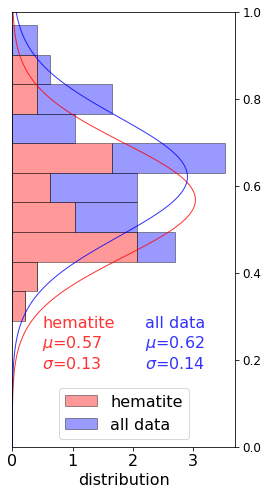

In [97]:
plt.figure(figsize=(4, 8))
plt.hist([f_compilation_hematite['f'].tolist(), f_compilation_other['f'].tolist()], 
         color=['red', 'blue'], edgecolor='k',stacked=1, 
         alpha=0.4, density=1, orientation='horizontal', label=['hematite' ,'all data'])
# f_compilation['f'].hist(bins=np.arange(0, 1 + 0.05, 0.05), grid=0, alpha=0.6, density=1, orientation='horizontal')



plt.text(.5,0.18, 'hematite\n$\mu$='+str(np.round(hem_mu,2))+'\n$\sigma$='+str(np.round(hem_std,2)), color='r', alpha=0.8, fontsize=16)
plt.plot(hem_p, hem_x, 'r', alpha=0.8, linewidth=1)

plt.text(2.2,0.18, 'all data\n$\mu$='+str(np.round(all_mu,2))+'\n$\sigma$='+str(np.round(all_std,2)), color='b', alpha=0.8, fontsize=16)
plt.plot(all_p, all_x, 'b', alpha=0.8, linewidth=1)

plt.xlabel('distribution', fontsize=16)
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0,1)
plt.legend(loc=8, fontsize=16)
# plt.title('all f factors in compilation')
# plt.savefig('../code_output/f_compilation.pdf', bbox_inches='tight')
plt.show()

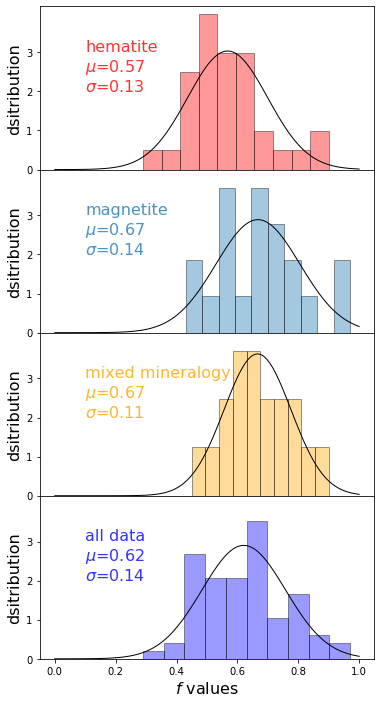

In [98]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(6,12), )
ax1.hist(f_compilation_hematite['f'], density=1, edgecolor='k', color='red', alpha=0.4)
ax2.hist(f_compilation_magnetite['f'], density=1, edgecolor='k', color='C0', alpha=0.4)
ax3.hist(f_compilation_mixed['f'], density=1, edgecolor='k', color='orange', alpha=0.4)
ax4.hist(f_compilation['f'], density=1, edgecolor='k',  color='b', alpha=0.4)

ax1.plot(hem_x, hem_p, 'k', linewidth=1)
ax2.plot(mag_x, mag_p, 'k', linewidth=1)
ax3.plot(mix_x, mix_p, 'k', linewidth=1)
ax4.plot(all_x, all_p, 'k', linewidth=1)

ax1.text(.1,2, 'hematite\n$\mu$='+str(np.round(hem_mu,2))+'\n$\sigma$='+str(np.round(hem_std,2)), color='r', alpha=0.8, fontsize=16)
ax2.text(.1,2, 'magnetite\n$\mu$='+str(np.round(mag_mu,2))+'\n$\sigma$='+str(np.round(mag_std,2)), color='C0', alpha=0.8, fontsize=16)
ax3.text(.1,2, 'mixed mineralogy\n$\mu$='+str(np.round(mix_mu,2))+'\n$\sigma$='+str(np.round(mix_std,2)), color='orange', alpha=0.8, fontsize=16)
ax4.text(.1,2, 'all data\n$\mu$='+str(np.round(all_mu,2))+'\n$\sigma$='+str(np.round(all_std,2)), color='b', alpha=0.8, fontsize=16)


plt.xlabel('$f$ values', fontsize=16)
ax1.set_ylabel('dsitribution', fontsize=16)
ax2.set_ylabel('dsitribution', fontsize=16)
ax3.set_ylabel('dsitribution', fontsize=16)
ax4.set_ylabel('dsitribution', fontsize=16)

ax1.set_yticks([0,1,2,3])
ax2.set_yticks([0,1,2,3])
ax3.set_yticks([0,1,2,3])
ax4.set_yticks([0,1,2,3])

fig.subplots_adjust(hspace=0)
# plt.savefig('../../figures/f_compilation_SI.pdf', bbox_inches='tight')
plt.show()